In [257]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve

# Load dataset

In [6]:
data_dir = "dataset/heart.csv"
dataset = pd.read_csv(data_dir)

**age**: age in years >> **numerical**  
**sex**: (1 = male; 0 = female) >> **categorical**  
**cp**: chest pain type >> **categorical**  
**trestbps**: resting blood pressure (in mm Hg on admission to the hospital) >> **numerical**  
**chol**: serum cholestoral in mg/dl >> **numerical**  
**fbs**: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) >> **categorical**  
**restecg**: resting electrocardiographic results >> **categorical**  
**thalach**: maximum heart rate achieved >> **numerical**  
**exang**: exercise induced angina (1 = yes; 0 = no) >> **categorical**  
**oldpeak**: ST depression induced by exercise relative to rest >> **numerical**  
**slope**: the slope of the peak exercise ST segment >> **categorical**  
**ca**: number of major vessels (0-3) colored by flourosopy >> **categorical**  
**thal**: 3 = normal; 6 = fixed defect; 7 = reversable defect >> **categorical**  
**target**: 1 or 0 >> **categorical**

# Explore dataset

In [7]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


#### # No missing data.

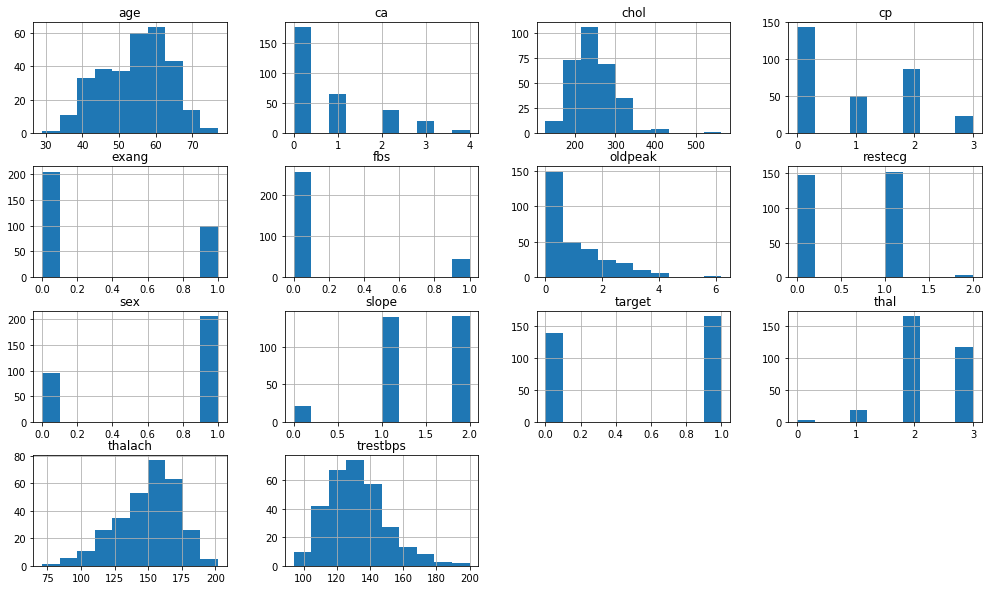

In [16]:
dataset.hist(figsize=(17, 10))
plt.show()

In [21]:
corr_matrix = dataset.corr()
corr_matrix["target"].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

# Train-test split

Since we don't know that we should split train-test purely random or base on some attribute, then, we will try both.

In [35]:
train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)

print("train_set: {}".format(train_set.shape))
print("test_set: {}".format(test_set.shape))
print(train_set["target"].value_counts() / len(train_set))
print(test_set["target"].value_counts() / len(test_set))

train_set: (242, 14)
test_set: (61, 14)
1    0.549587
0    0.450413
Name: target, dtype: float64
1    0.52459
0    0.47541
Name: target, dtype: float64


In [36]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(dataset, dataset["target"]):
    strat_train_set = dataset.loc[train_index]
    strat_test_set = dataset.loc[test_index]
    
print("train_set: {}".format(strat_train_set.shape))
print("test_set: {}".format(strat_test_set.shape))
print(strat_train_set["target"].value_counts() / len(strat_train_set))
print(strat_test_set["target"].value_counts() / len(strat_test_set))

train_set: (242, 14)
test_set: (61, 14)
1    0.545455
0    0.454545
Name: target, dtype: float64
1    0.540984
0    0.459016
Name: target, dtype: float64


# Data preparation

#### Do nothing
- exang  
- fbs  
- sex  
- target  

In [165]:
do_nothing_columns = ["exang", "fbs", "sex", "target"]
train_set_donothing = pd.DataFrame(train_set[do_nothing_columns].values, columns=do_nothing_columns)
test_set_donothing = pd.DataFrame(test_set[do_nothing_columns].values, columns=do_nothing_columns)

#### Normalization
- age  
- trestbps  
- chol  
- thalach  
- oldpeak  

In [166]:
normalization_columns = ["age", "trestbps", "chol", "thalach", "oldpeak"]
std_scaler = StandardScaler()
std_scaler.fit(train_set[normalization_columns])
train_set_normalized = pd.DataFrame(std_scaler.transform(train_set[normalization_columns]), columns=normalization_columns)
test_set_normalized = pd.DataFrame(std_scaler.transform(test_set[normalization_columns]), columns=normalization_columns)

C:\Users\Acer\Anaconda3\envs\tf\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Acer\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\Acer\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


#### One-hot encoder 
- cp   
- restecg  
- slope  
- ca  
- thal    

In [167]:
onehot_encoder_columns = ["cp", "restecg", "slope", "ca", "thal"]
train_set_cat = train_set[onehot_encoder_columns]
test_set_cat = test_set[onehot_encoder_columns]

encoder = OneHotEncoder(categories="auto")
encoder.fit(train_set_cat)
train_set_encoded = pd.DataFrame(encoder.transform(train_set_cat).toarray(), columns=encoder.get_feature_names(onehot_encoder_columns))
test_set_encoded = pd.DataFrame(encoder.transform(test_set_cat).toarray(), columns=encoder.get_feature_names(onehot_encoder_columns))

### Merge prepared data

In [176]:
train_set_prepared = pd.concat([train_set_donothing, train_set_normalized, train_set_encoded], axis=1)
test_set_prepared = pd.concat([test_set_donothing, test_set_normalized, test_set_encoded], axis=1)

In [183]:
x_train = train_set_prepared.drop("target", axis=1)
y_train = train_set_prepared["target"]
x_test = test_set_prepared.drop("target", axis=1)
y_test = test_set_prepared["target"]

# Find best perform model

In [281]:
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

print("Test on training data")
sgd_clf.fit(x_train, y_train)
print("Score: {}".format(sgd_clf.score(x_train, y_train)))
print()

print("Test with Cross-validation")
score = cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring="accuracy")
print("Scores: {}".format(score))
print("Mean: {}".format(score.mean()))
print("Standard: {}".format(score.std()))
print()

print("Test Precision and Recall")
y_train_predicted = cross_val_predict(sgd_clf, x_train, y_train, cv=3)
print("precision_score: {}".format(precision_score(y_train, y_train_predicted)))
print("recall_score: {}".format(recall_score(y_train, y_train_predicted)))
print("f1_score: {}".format(f1_score(y_train, y_train_predicted)))

Test on training data
Score: 0.8636363636363636

Test with Cross-validation
Scores: [0.69512195 0.725      0.825     ]
Mean: 0.7483739837398374
Standard: 0.055538780599141295

Test Precision and Recall
precision_score: 0.8157894736842105
recall_score: 0.6992481203007519
f1_score: 0.7530364372469636


In [282]:
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)

print("Test on training data")
forest_clf.fit(x_train, y_train)
print("Score: {}".format(forest_clf.score(x_train, y_train)))
print()

print("Test with Cross-validation")
score = cross_val_score(forest_clf, x_train, y_train, cv=3, scoring="accuracy")
print("Scores: {}".format(score))
print("Mean: {}".format(score.mean()))
print("Standard: {}".format(score.std()))
print()

print("Test Precision and Recall")
y_train_predicted = cross_val_predict(forest_clf, x_train, y_train, cv=3)
print("precision_score: {}".format(precision_score(y_train, y_train_predicted)))
print("recall_score: {}".format(recall_score(y_train, y_train_predicted)))
print("f1_score: {}".format(f1_score(y_train, y_train_predicted)))

Test on training data
Score: 1.0

Test with Cross-validation
Scores: [0.82926829 0.7625     0.85      ]
Mean: 0.8139227642276423
Standard: 0.03733342052976985

Test Precision and Recall
precision_score: 0.8235294117647058
recall_score: 0.8421052631578947
f1_score: 0.83271375464684


In [283]:
tree_clf = DecisionTreeClassifier(random_state=42)

print("Test on training data")
tree_clf.fit(x_train, y_train)
print("Score: {}".format(tree_clf.score(x_train, y_train)))
print()

print("Test with Cross-validation")
score = cross_val_score(tree_clf, x_train, y_train, cv=3, scoring="accuracy")
print("Scores: {}".format(score))
print("Mean: {}".format(score.mean()))
print("Standard: {}".format(score.std()))
print()

print("Test Precision and Recall")
y_train_predicted = cross_val_predict(tree_clf, x_train, y_train, cv=3)
print("precision_score: {}".format(precision_score(y_train, y_train_predicted)))
print("recall_score: {}".format(recall_score(y_train, y_train_predicted)))
print("f1_score: {}".format(f1_score(y_train, y_train_predicted)))

Test on training data
Score: 1.0

Test with Cross-validation
Scores: [0.68292683 0.6375     0.75      ]
Mean: 0.6901422764227642
Standard: 0.04621045702889647

Test Precision and Recall
precision_score: 0.7265625
recall_score: 0.6992481203007519
f1_score: 0.7126436781609196


# Fine-tune hyperparameters

# Analyze the best model

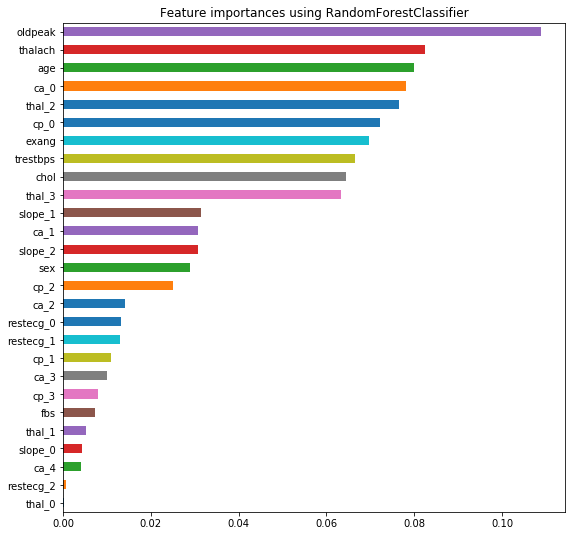

thal_0       0.000150
restecg_2    0.000630
ca_4         0.004026
slope_0      0.004362
thal_1       0.005272
fbs          0.007255
cp_3         0.008063
ca_3         0.010057
cp_1         0.010912
restecg_1    0.013093
restecg_0    0.013279
ca_2         0.014024
cp_2         0.025039
sex          0.028873
slope_2      0.030684
ca_1         0.030741
slope_1      0.031330
thal_3       0.063344
chol         0.064393
trestbps     0.066522
exang        0.069671
cp_0         0.072310
thal_2       0.076545
ca_0         0.078182
age          0.079892
thalach      0.082420
oldpeak      0.108929
dtype: float64


In [286]:
feature_importances = pd.Series(forest_clf.feature_importances_.reshape(27), index=x_train.columns)
feature_importances_sorted = feature_importances.sort_values(ascending=True)
feature_importances_sorted.plot(kind="barh", figsize=(9, 9))
plt.title("Feature importances using RandomForestClassifier")
plt.show()
print(feature_importances_sorted)

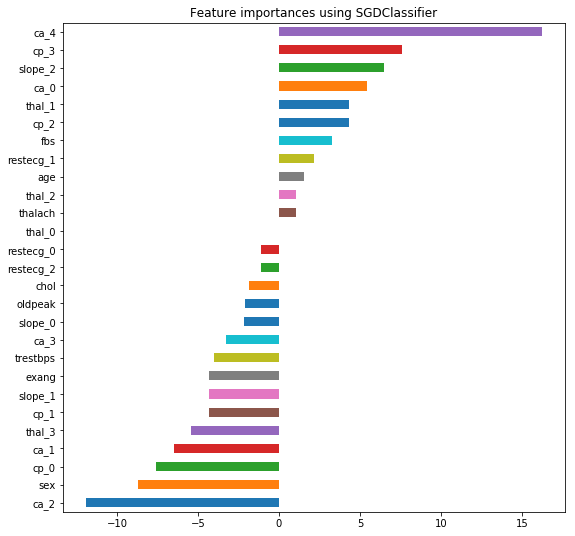

ca_2        -11.921535
sex          -8.670207
cp_0         -7.586431
ca_1         -6.502655
thal_3       -5.418879
cp_1         -4.335104
slope_1      -4.335104
exang        -4.335104
trestbps     -4.001066
ca_3         -3.251328
slope_0      -2.167552
oldpeak      -2.068470
chol         -1.851333
restecg_2    -1.083776
restecg_0    -1.083776
thal_0        0.000000
thalach       1.068900
thal_2        1.083776
age           1.533847
restecg_1     2.167552
fbs           3.251328
cp_2          4.335104
thal_1        4.335104
ca_0          5.418879
slope_2       6.502655
cp_3          7.586431
ca_4         16.256638
dtype: float64


In [288]:
feature_importances = pd.Series(sgd_clf.coef_.reshape(27), index=x_train.columns)
feature_importances_sorted = feature_importances.sort_values(ascending=True)
feature_importances_sorted.plot(kind="barh", figsize=(9, 9))
plt.title("Feature importances using SGDClassifier")
plt.show()
print(feature_importances_sorted)